In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("all_data.csv", index_col=False)
df = pd.DataFrame(data)

In [3]:
shape_df = df.shape # df.index
print(f"Row: {shape_df[0]}, Columns: {shape_df[1]}")

Row: 39975, Columns: 37


In [4]:
df.dtypes

time                           int64
M01.VELOC                    float64
M02.VELOC                    float64
M03.VELOC                    float64
M04.VELOC                    float64
M05.VELOC                    float64
M06.VELOC                    float64
M07.VELOC                    float64
M08.VELOC                    float64
M11.VELOC                    float64
M12.VELOC                    float64
PIC_6101.PV(Bar)             float64
PIC_6101.SP(Bar)             float64
PIC_6101.MV(%)               float64
LIC_3101.PV(%)               float64
LIC_3101.SP(%)                 int64
LIC_3101.MV(%)               float64
PIC_3101.PV(Bar)             float64
PIC_3101.SP(Bar)             float64
PIC_3101.MV(%)               float64
FIT_5101.PV(Ton/h)           float64
LIT_3101.PV(%)               float64
PIT_2101.PV(Bar)             float64
PIT_6101.PV(mm2H2O)          float64
TT_2101.PV(ºC)               float64
TT_5101.PV(ºC)               float64
TT_6101.PV(ºC)               float64
T

Motores tão incompletos:
M01 -> M01_IDF.VELOC -> M01IDF -> Velocidade do motor 01
2 bombas, apenas uma pode estar ligada 
M01IDF: Exaustor
pv= processe variable ()
mv=manipulated value (manipula outra coisa)
sp=set point

In [5]:
df.columns.values

array(['time', 'M01.VELOC', 'M02.VELOC', 'M03.VELOC', 'M04.VELOC',
       'M05.VELOC', 'M06.VELOC', 'M07.VELOC', 'M08.VELOC', 'M11.VELOC',
       'M12.VELOC', 'PIC_6101.PV(Bar)', 'PIC_6101.SP(Bar)',
       'PIC_6101.MV(%)', 'LIC_3101.PV(%)', 'LIC_3101.SP(%)',
       'LIC_3101.MV(%)', 'PIC_3101.PV(Bar)', 'PIC_3101.SP(Bar)',
       'PIC_3101.MV(%)', 'FIT_5101.PV(Ton/h)', 'LIT_3101.PV(%)',
       'PIT_2101.PV(Bar)', 'PIT_6101.PV(mm2H2O)', 'TT_2101.PV(ºC)',
       'TT_5101.PV(ºC)', 'TT_6101.PV(ºC)', 'TT_6102.PV(ºC)',
       'TT_6103.PV(ºC)', 'FIC_2101.PV(m3/h)', 'FIC_2101.SP(m3/h)',
       'FIC_2101.MV(%)', 'AUXILIAR_VAZAO_COMPENSADA', 'FIT_5101.PV(kg/s)',
       'PIT_6101.PV(Pa)', 'FIC_2101.PV(kg/s)', 'FIC_2101.SP(kg/s)'],
      dtype=object)

In [6]:
df.head()

,time,M01.VELOC,M02.VELOC,M03.VELOC,M04.VELOC,M05.VELOC,M06.VELOC,M07.VELOC,M08.VELOC,M11.VELOC,...,TT_6102.PV(ºC),TT_6103.PV(ºC),FIC_2101.PV(m3/h),FIC_2101.SP(m3/h),FIC_2101.MV(%),AUXILIAR_VAZAO_COMPENSADA,FIT_5101.PV(kg/s),PIT_6101.PV(Pa),FIC_2101.PV(kg/s),FIC_2101.SP(kg/s)
0,0,11.521,6.299,9.001,0.0,0.0,0.0,0.0,0.0,0.0,...,444.444,109.896,0.016,0.0,73.0,0.066,0.021389,-49.1215,0.004444,0.0
1,1,11.521,6.299,9.001,0.0,0.0,0.0,0.0,0.0,0.0,...,444.444,109.896,0.016,0.0,73.0,0.066,0.021389,-49.1215,0.004444,0.0
2,2,11.521,6.299,9.001,0.0,0.0,0.0,0.0,0.0,0.0,...,444.401,109.896,0.016,0.0,73.0,0.066,0.021389,-49.2980,0.004444,0.0
3,3,11.521,6.299,9.001,0.0,0.0,0.0,0.0,0.0,0.0,...,444.314,109.896,0.016,0.0,73.0,0.066,0.021389,-49.4059,0.004444,0.0
4,4,11.506,6.299,9.001,0.0,0.0,0.0,0.0,0.0,0.0,...,444.184,109.831,0.016,0.0,73.0,0.066,0.021389,-49.3765,0.004444,0.0


In [7]:
df.tail()

,time,M01.VELOC,M02.VELOC,M03.VELOC,M04.VELOC,M05.VELOC,M06.VELOC,M07.VELOC,M08.VELOC,M11.VELOC,...,TT_6102.PV(ºC),TT_6103.PV(ºC),FIC_2101.PV(m3/h),FIC_2101.SP(m3/h),FIC_2101.MV(%),AUXILIAR_VAZAO_COMPENSADA,FIT_5101.PV(kg/s),PIT_6101.PV(Pa),FIC_2101.PV(kg/s),FIC_2101.SP(kg/s)
39970,30796,32.871,23.833,34.043,0.0,0.000,15.322,27.239,0.0,48.003,...,464.149,155.094,0.016,5.987,100.0,3.811,1.10028,-60.7620,0.004444,1.66306
39971,30797,32.791,23.804,33.999,0.0,0.000,15.308,27.195,0.0,48.003,...,464.019,155.094,0.016,6.039,100.0,3.807,1.09889,-60.0167,0.004444,1.67750
39972,30798,32.593,23.745,33.918,0.0,0.000,15.256,27.129,0.0,48.003,...,463.932,154.980,0.016,6.135,100.0,3.802,1.09750,-60.1932,0.004444,1.70417
39973,30799,32.520,23.635,33.750,0.0,8.225,15.198,27.012,0.0,48.003,...,463.932,154.980,0.016,6.170,100.0,3.798,1.09611,-59.2322,0.004444,1.71389
39974,30800,32.424,23.577,33.691,0.0,18.984,15.154,26.946,0.0,48.003,...,463.889,154.980,0.017,6.204,100.0,3.795,1.09500,-58.8399,0.004722,1.72333


In [8]:
df.describe(include="all")

,time,M01.VELOC,M02.VELOC,M03.VELOC,M04.VELOC,M05.VELOC,M06.VELOC,M07.VELOC,M08.VELOC,M11.VELOC,...,TT_6102.PV(ºC),TT_6103.PV(ºC),FIC_2101.PV(m3/h),FIC_2101.SP(m3/h),FIC_2101.MV(%),AUXILIAR_VAZAO_COMPENSADA,FIT_5101.PV(kg/s),PIT_6101.PV(Pa),FIC_2101.PV(kg/s),FIC_2101.SP(kg/s)
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,25612.277148,26.202105,19.602326,27.856309,2.951421,34.054564,15.080061,20.235802,1.721540,20.825114,...,422.737220,129.634752,2.685994,2.673839,78.526408,2.413115,0.714559,-48.556785,0.746109,0.742733
std,14243.622070,10.404212,8.875358,12.776495,10.971722,21.628853,17.514594,12.349917,4.356833,23.590596,...,70.922832,20.826304,1.742267,1.829178,5.384626,1.520831,0.448039,14.013720,0.483963,0.508105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,173.655000,42.350000,0.016000,0.000000,73.000000,0.000000,0.000000,-490.332000,0.004444,0.000000
25%,17421.500000,20.251000,14.575000,20.618000,0.000000,0.000000,0.000000,15.015000,0.000000,0.000000,...,399.479000,114.421000,1.690000,0.000000,73.000000,1.607000,0.480556,-51.435900,0.469444,0.000000
50%,23707.000000,26.426000,19.915000,28.381000,0.000000,46.904000,12.678000,22.214000,0.000000,0.000000,...,426.259000,138.249000,2.998000,3.088000,78.375000,2.828000,0.831667,-49.376500,0.832778,0.857778
75%,40806.500000,32.747000,25.605000,36.467000,0.000000,47.915000,18.069000,28.198000,0.000000,48.003000,...,474.436000,142.480000,3.741500,3.811000,80.177000,3.292000,0.970139,-47.140600,1.039305,1.058610
max,50800.000000,60.000000,41.990000,60.000000,43.792000,60.000000,60.000000,48.003000,15.000000,48.003000,...,555.773000,157.650000,8.703000,7.814000,100.000000,5.715000,1.686110,65.018100,2.417500,2.170560


In [9]:
# df.isnull() """show if have null values like "head()" structure"""
# df.isnull().any()  """show if have null values like "dtype" structure """
df.isnull().any().any()

np.False_

-Well the data frame aparently god and dont need to be clear, so lets start see
some graph


-pegar os dados de cada coluna e colocar em uma array isolada

-colocar as colunas como cloumns and index

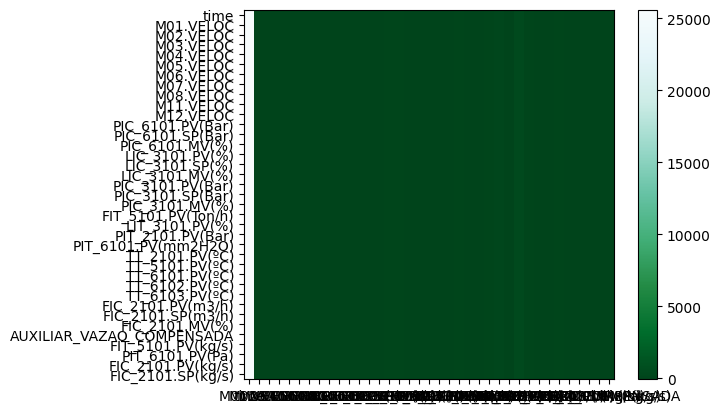

In [10]:
idx = df.columns.values 
cols = df.columns.values
list =[]
array = []

for column in df: # column is just a name of columns in my df
    column_list = np.mean(df[f"{column}"].to_list())
    list.append(column_list)
    # print(column_list)

    column_array = np.mean(df[f"{column}"].to_numpy())
    array.append(column_list)
    # print(column_array)
    
heatmap_df = pd.DataFrame([list])

# print(len(list), list,"\n")
# print(len(array), array,"\n")
# print(len(cols), cols,"\n")
# print(len(idx), idx,"\n")

df_list = pd.DataFrame([list], columns=cols, index=idx)
df_array = pd.DataFrame([array], columns=cols, index=idx)

plt.imshow(df_list, cmap="BuGn_r")
plt.colorbar()
plt.xticks(range(len(df_list)), df_list.columns)
plt.yticks(range(len(df_list)), df_list.index)
plt.show()

<Axes: >

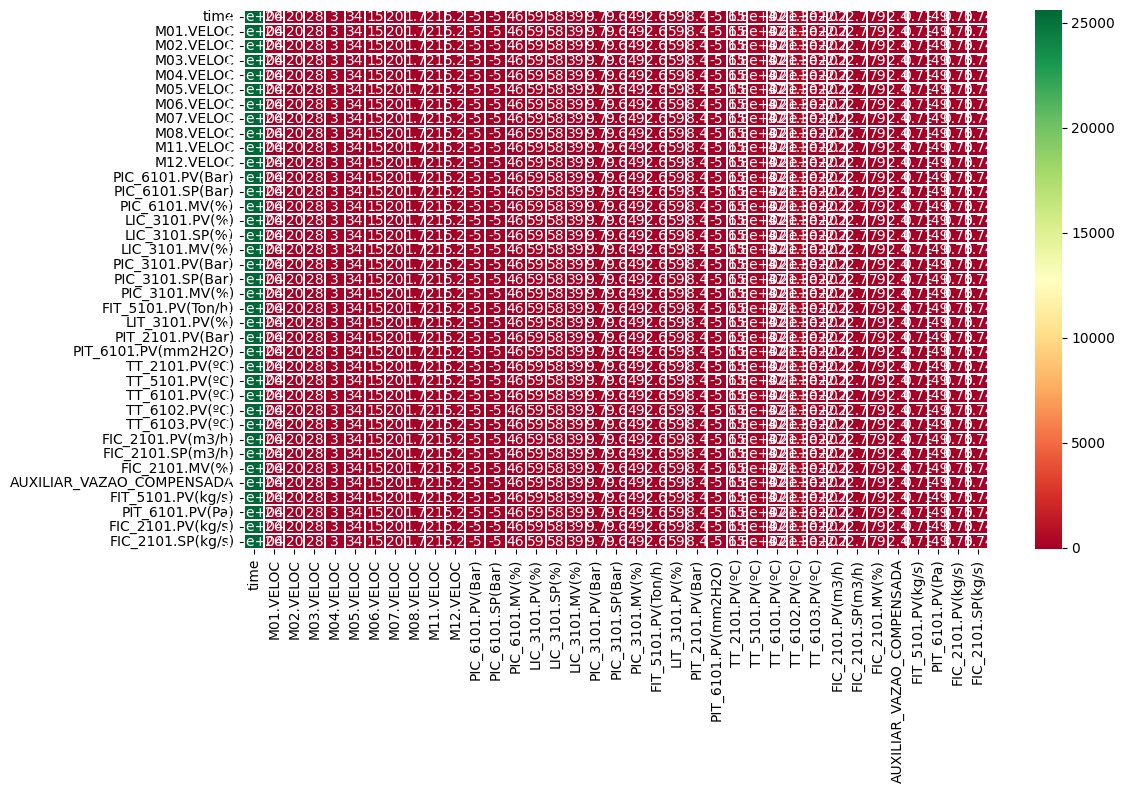

In [11]:
# Python program to generate heatmap which  
# represents panda dataframe in color-coding schemes 
# along with values mentioned in each cell 
  
# import required libraries 
import pandas as pd 
import seaborn as sns  
  
# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (12, 7)) 
  
# Defining index for the dataframe 
# idx = ['1', '2', '3', '4'] 
  
# # Defining columns for the dataframe 
# cols = list['A','B','C','D'] 
  
# # Entering values in the index and columns   
# # and converting them into a panda dataframe 
# df = pd.DataFrame([[10, 20, 30, 40], [50, 30, 8, 15], 
                #    [25, 14, 41, 8], [7, 14, 21, 28]], 
                #    columns = cols, index = idx) 
  
# Displaying dataframe as an heatmap  
# with diverging colourmap as RdYlGn 
sns.heatmap(df_array, cmap ='RdYlGn', linewidths = 0.30, annot = True) 